Using TensorFlow backend.


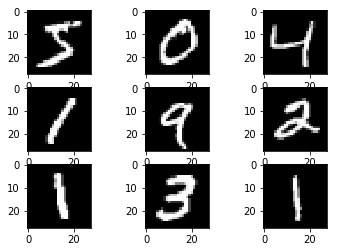

In [1]:
# Plot images
from keras.datasets import mnist
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

In [2]:
print("TRAIN data  shape:", X_train.shape)
print("TRAIN label shape:", y_train.shape)

print("TEST  data  shape:", X_test.shape)
print("TEST  label shape:", y_test.shape)

TRAIN data  shape: (60000, 28, 28)
TRAIN label shape: (60000,)
TEST  data  shape: (10000, 28, 28)
TEST  label shape: (10000,)


/anaconda/envs/py35/lib/python3.5/site-packages/keras/preprocessing/image.py:648: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (60000, 1, 28, 28) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


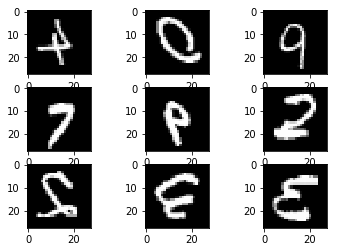

In [3]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('th')
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#
# Standardize images across the dataset, mean=0, stdev=1
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# ZCA whitening
datagen = ImageDataGenerator(zca_whitening=True)
# Random Rotations
datagen = ImageDataGenerator(rotation_range=90)
# Random Shifts
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# Random Flips
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

In [4]:
print("TRAIN data  shape:", X_train.shape)
print("TRAIN label shape:", y_train.shape)

print("TEST  data  shape:", X_test.shape)
print("TEST  label shape:", y_test.shape)

TRAIN data  shape: (60000, 1, 28, 28)
TRAIN label shape: (60000,)
TEST  data  shape: (10000, 1, 28, 28)
TEST  label shape: (10000,)
